Мы маркетинговые аналитики развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев наш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

## Изучение данных из файлов

Импортируем нужные нам библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Считываем файлы с данными.

In [2]:
sessions, orders, costs = (
    pd.read_csv('https://drive.google.com/file/d/1b2JkgGPpgBuK-csFdC8OJptH2b_ff8N3/view?usp=sharing'),  # информация о посещениях сайта
    pd.read_csv('https://drive.google.com/file/d/1b6rTwogEw5HMYVWiSYNxCC35N6dd9qoS/view?usp=sharing'),  # информация о заказах
    pd.read_csv('https://drive.google.com/file/d/1LpaHIjm2Z3CLs18qAEhXLNctNAqPrx7F/view?usp=sharing'),  # информация о затратах на маркетинг
)

Посмотрим данные из таблицы `visits`

In [3]:
sessions.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
sessions.isna().sum() / sessions.shape[0] * 100

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

In [6]:
sessions.duplicated().sum()

0

Описание `visits`:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Посмотрим данные из таблицы `orders`

In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders.isna().sum() / orders.shape[0] * 100

User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

In [10]:
orders.duplicated().sum()

0

Описание `orders`:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Посмотрим данные из таблицы `costs`

In [11]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
costs.isna().sum() / costs.shape[0] * 100

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

In [14]:
costs.duplicated().sum()

0

Описание `costs`:
* Channel — идентификатор рекламного источника,
* Dt — дата проведения рекламной кампании,
* Costs — расходы на эту кампанию.

**Вывод** 

Проанализировав входные данные видим, что таблицы не имеют пропущенных значений и дубликатов. Необходимо привести к нижнему регистру названия столбцов и перевести данные с датами к нужному типу.

## Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [15]:
sessions.columns = sessions.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Переименуем столбецs в таблице `visits`

In [16]:
sessions.rename(columns={'session start':'session_start', 'session end':'session_end', 'user id':'user_id'}, inplace=True)
orders.rename(columns={'event dt':'event_dt', 'user id':'user_id'}, inplace=True)

Преобразуем данные о времени.

In [17]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

**Вывод**

Предобработка завершена, названия столбцов были приведены к нижнему регистру, также названия были приведены к змеиному стилю и преобразованы данные о времени.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

Создадим необходимые функции для дальнейших расчетов.

### Функция для создания пользовательских профилей

In [18]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта конверсии

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта LTV и ROI

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания фрейма

In [22]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания

In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации LTV и ROI

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(23, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ

### Построение профилей пользователей.

In [26]:
profiles = get_profiles(sessions, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Результат — 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить приложение.

### Определение минимальной и максимальной даты привлечения пользователей.

In [27]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа

In [28]:
display(min_analysis_date, observation_date)

Timestamp('2019-05-01 00:00:00')

Timestamp('2019-10-27 00:00:00')

Минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года. Все корректно, соответствует условию.

### Определение из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [29]:
region_payer = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='region')
region_payer['user_payer'] = profiles.query('payer==True').groupby('region').agg({'user_id': 'nunique'})
region_payer['user_fraction'] = ((region_payer['user_payer'] / profiles.query('payer==True')['region'].count()) * 100)
region_payer['payer_fraction'] = ((region_payer['user_payer'] / region_payer['user_id']) * 100)
region_payer.sort_values(by='user_fraction', ascending=False).style.format({'user_fraction': '{:.2f}%', 'payer_fraction':'{:.2f}%'})

,user_id,user_payer,user_fraction,payer_fraction
region,,,,
United States,100002,6902,77.72%,6.90%
UK,17575,700,7.88%,3.98%
France,17450,663,7.47%,3.80%
Germany,14981,616,6.94%,4.11%


* Наибольшее количество пользователей приходят из **США 100 002**, доля платящих из них **6,9%**
* Далее идет **Великобритания 17 575** пользователей, доля платящих из них **3,98%**
* Затем идет **Франция 17 450** пользователей, доля платящих из них **3,8%**
* И замыкает **Германия 14 981** пользователей, доля платящих из них **4,11%**

### Определени какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

In [30]:
device_payer = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by = 'user_id')
device_payer['user_payer'] = profiles.query('payer==True').groupby('device').agg({'user_id': 'nunique'})
device_payer['user_fraction'] = ((device_payer['user_payer'] / profiles.query('payer==True')['device'].count()) * 100)
device_payer['payer_fraction'] = ((device_payer['user_payer'] / device_payer['user_id']) * 100)
device_payer.sort_values(by='user_id', ascending=False).style.format({'user_fraction': '{:.2f}%', 'payer_fraction':'{:.2f}%'})

,user_id,user_payer,user_fraction,payer_fraction
device,,,,
iPhone,54479,3382,38.08%,6.21%
Android,35032,2050,23.08%,5.85%
PC,30455,1537,17.31%,5.05%
Mac,30042,1912,21.53%,6.36%


* Наибольшее количество пользователей используют **iPhone 54 479**, доля платящих из них **6,21%**
* Далее идет **Android 35 032**, доля платящих из них **5,85%**
* Затем идет **PC 30 455**, доля платящих из них **5.05%**
* И замыкает **Mac 30 042**, доля платящих из них **6.36%**

### Определение рекламных источников привлечения и каналов, из которых пришло больше всего платящих пользователей.

In [31]:
channel_payer = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False)
channel_payer['user_payer'] = profiles.query('payer==True').groupby('channel').agg({'user_id': 'nunique'})
channel_payer['user_fraction'] = ((channel_payer['user_payer'] / profiles.query('payer==True')['channel'].count()) * 100)
channel_payer['payer_fraction'] = ((channel_payer['user_payer'] / channel_payer['user_id']) * 100)
channel_payer.sort_values(by='payer_fraction', ascending=False).style.format({'user_fraction': '{:.2f}%', 'payer_fraction':'{:.2f}%'})

,user_id,user_payer,user_fraction,payer_fraction
channel,,,,
FaceBoom,29144,3557,40.05%,12.20%
AdNonSense,3880,440,4.95%,11.34%
lambdaMediaAds,2149,225,2.53%,10.47%
TipTop,19561,1878,21.15%,9.60%
RocketSuperAds,4448,352,3.96%,7.91%
WahooNetBanner,8553,453,5.10%,5.30%
YRabbit,4312,165,1.86%,3.83%
MediaTornado,4364,156,1.76%,3.57%
LeapBob,8553,262,2.95%,3.06%


* Наибольшее количество платящих пользователей пришли в приложение через **FaceBoom 12,2%**
* Следующий канал привлечения платящих пользвователей **AdNonSense 11,34%**
* Затем идет канал **lambdaMediaAds 10,47%**
* Менее всего платящих пользователей пришли через канал **organik 2,06%**

**Вывод**

* Пользователи заходят в приложение из США, Великобритания, Германия, Франция.
* Наибольшее количество пользователей приходят из **США 100 002** что составляет **77,72%** от всего количества пользователей, доля платящих из них **6,9%**.
* Больше всего пользователей **54 479** используют **iPhone**, платящих из них **6,21%**.
* Наибольшее количество пользователей пришли через **FaceBoom 12,2%** и **AdNonSense 11,34%**.

## Маркетинг

### Расчет общей суммы расходов на маркетинг. Как траты распределены по источникам. Визуализация изменения метрик во времени.

Для расчета суммы расходов на маркетинг нам понадобится таблица `costs`

In [32]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [33]:
costs['costs'].sum().round()

105497.0

Из статистических данных видим, что всего на маркетинг было потрачено 105 497 долларов. Максимальный платеж составлял 630 дол., а минимальный 0,8 дол.

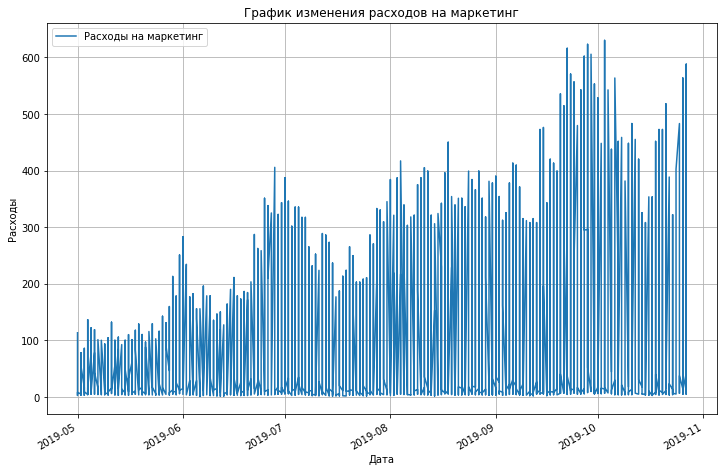

In [34]:
costs.plot(y='costs',
           x='dt',
           figsize=(12, 8),
           grid=True, 
           label='Расходы на маркетинг',                       
           legend=True,
           ) 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

Видим увеличение затрат на маркетинг на протяжении всего времени. В конце сентября и начале октября расходы были на максимальных уровнях.

In [35]:
costs_channel = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_channel['costs_fraction'] = (costs_channel['costs'] / costs_channel['costs'].sum()) * 100
costs_channel.style.format({'costs_fraction':'{:.2f}%', 'costs':'{:.2f}'})

,costs,costs_fraction
channel,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


Из всех каналов выделяются **TipTop** и **FaceBoom** с затратами на маркетинг в 54 751,3 дол и 32 445,6 дол соответственно.

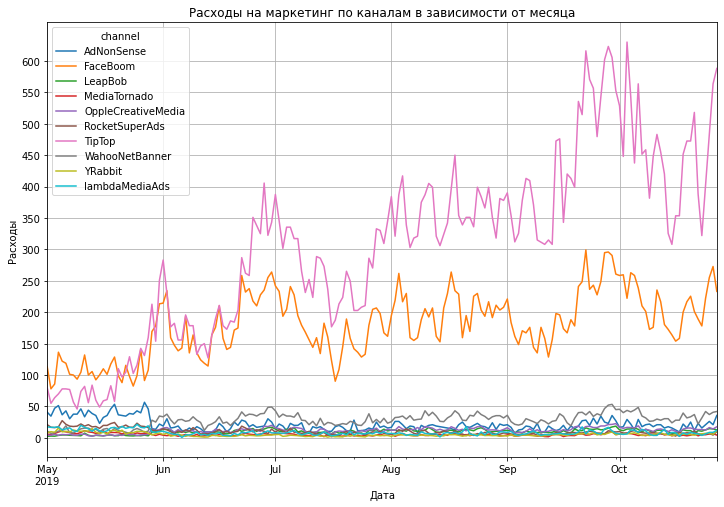

In [36]:
filtered_data = costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
)
filtered_data.plot(
           figsize=(12, 8),
           grid=True, 
           label='Каналы',                       
           legend=True,
           ) 

plt.yticks(np.arange(0, 650, 50))
plt.title('Расходы на маркетинг по каналам в зависимости от месяца')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()


В разрезе по датам так же выделяются каналы **TipTop** и **FaceBoom**. Больше всего трафика закупалось у **TipTop** и в конце сентября, начале октября были максимальными и составляли 630 дол. **FaceBoom** идет вторым, пик затрат так же был в конце сентября и составил 300 дол. Расходы по остальным каналам обхдились сравнительно дешево. Рассотрим их отдельно.

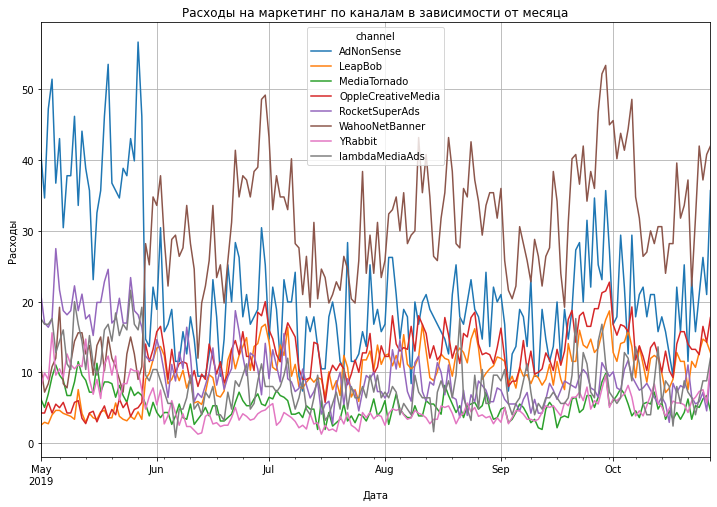

In [37]:
filtered_data1 = costs.query('(channel != "TipTop") & (channel != "FaceBoom")').pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data1.plot(
           figsize=(12, 8),
           grid=True, 
           label='Каналы',                       
           legend=True,
           ) 

plt.yticks(np.arange(0, 60, 10))
plt.title('Расходы на маркетинг по каналам в зависимости от месяца')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

Расходы на маркетинг по каналу **AdNonSense** начали сокращаться в конце мая, а по каналу **WahooNetBanner** наоборот увеличиваться, пик был в конце сентября и составил 53 дол. Расходы по остальным источникам колеблились от 3 до 23 долларов.

### Расчет средней стоимости привлечения одного пользователя из каждого источника.

Чтобы рассчитать средний САС нам понадобится таблица профилей пользователей.

In [38]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Исключим из расчетов источник **organic**, т.к. на него мы не расходуем средства.

In [39]:
profiles.query('channel != "organic"').describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


Медианная стоимость привлечения одного пользователя 1.08 дол. При этом среднее составляет 1.1 дол. Максимальная стоимость привлечения пользователя 3.71 дол.

In [40]:
channel_cac = pd.DataFrame()
channel_cac['acquisition_cost_mean'] = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean()
channel_cac.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


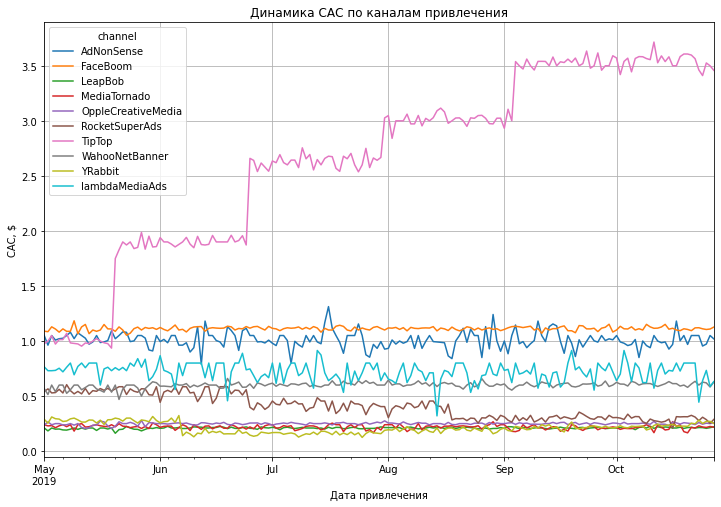

In [41]:
profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(12, 8))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Самый дорогой трафик - **TipTop**, средняя стоимость - 2.80 дол. за пользователя, далее идет **FaceBoom** и **AdNonSense** примерно в равной ценовой категории 1.11 и 1.01 дол. соответственно. Остальные каналы берут за пользователя от 0.21 до 0.72 дол.

**Вывод**

* Всего на маркетинг было потрачено 105 497 долларов. Затраты увеличиваль на протяжении всего времени исследования.
* Среди всех сточников выделяются **TipTop** и **FaceBoom** с затратами на маркетинг в 54 751,3 дол и 32 445,6 дол соответственно.
* В разрезе по датам так же выделяются каналы **TipTop** и **FaceBoom** с максимальными затратами в 630 дол. и 300 дол. по каналу **WahooNetBanner** пик составил 53 дол. Расходы по остальным источникам колеблились от 3 до 23 долларов.
* Медианная стоимость привлечения одного пользователя 1.08 дол., среднее составляет 1.1 дол., максимальная стоимость привлечения пользователя 3.71 дол.
* Самый дорогой пользователь у **TipTop** 2.8 дол., **FaceBoom** и **AdNonSense** примерно в равной ценовой категории 1.11 и 1.01 дол., Остальные каналы берут за пользователя от 0.21 до 0.72 дол.

## Оценка окупаемости рекламы

###  Анализ общей окупаемости рекламы.

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

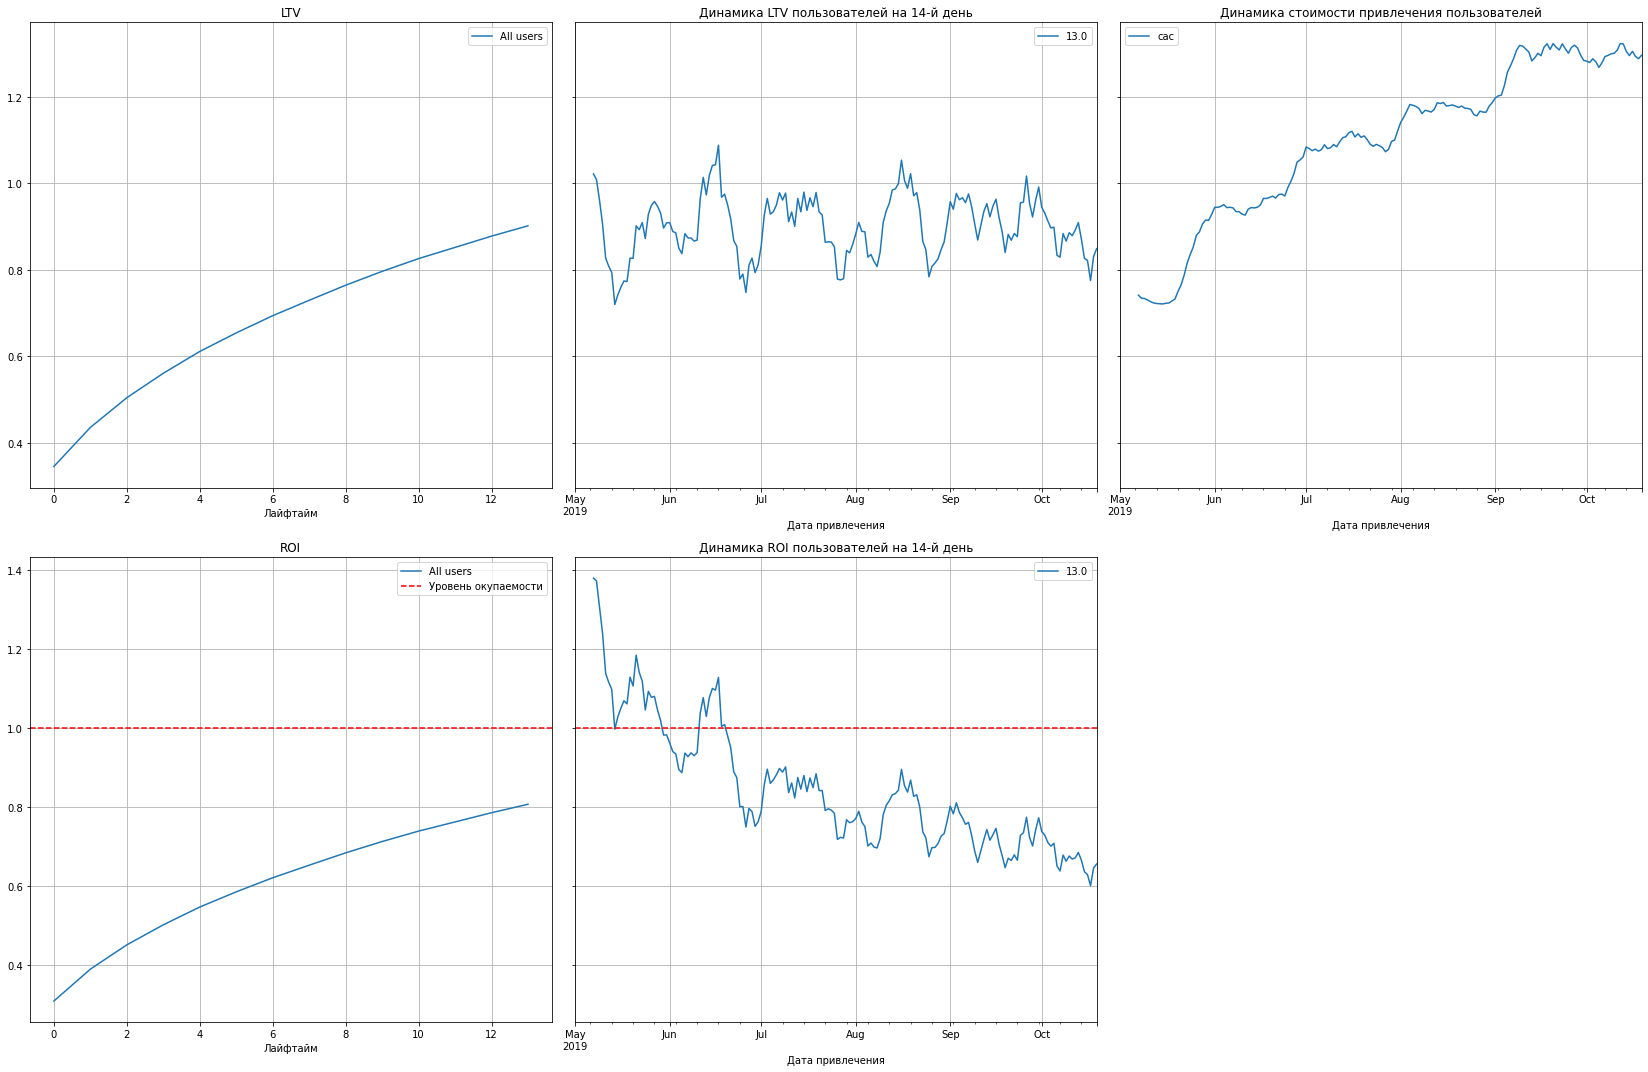

In [42]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

1. ROI не окупается к концу второй недели и  составляет около 85%.
2. LTV пользователей увеличилось в 4 раза за 14 дней, 0,2 до 0,8.
3. Реклама начитает окупаться только к концу второй недели.
4. САС не стабилен, рекламный бюджет постоянно увеличиватся, в конце мая - начале июня было резкое увеличение бюджета.
5. На LTV в целом стабилен. Значит, дело не в ухудшении качества пользователей.
6. ROI пользователя падает, во второй половине июля перестал окупаться и снизился до 0.6. 

### Анализ окупаемости рекламы с разбивкой по рекламным каналам.

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI в разрезе по рекламным каналам.

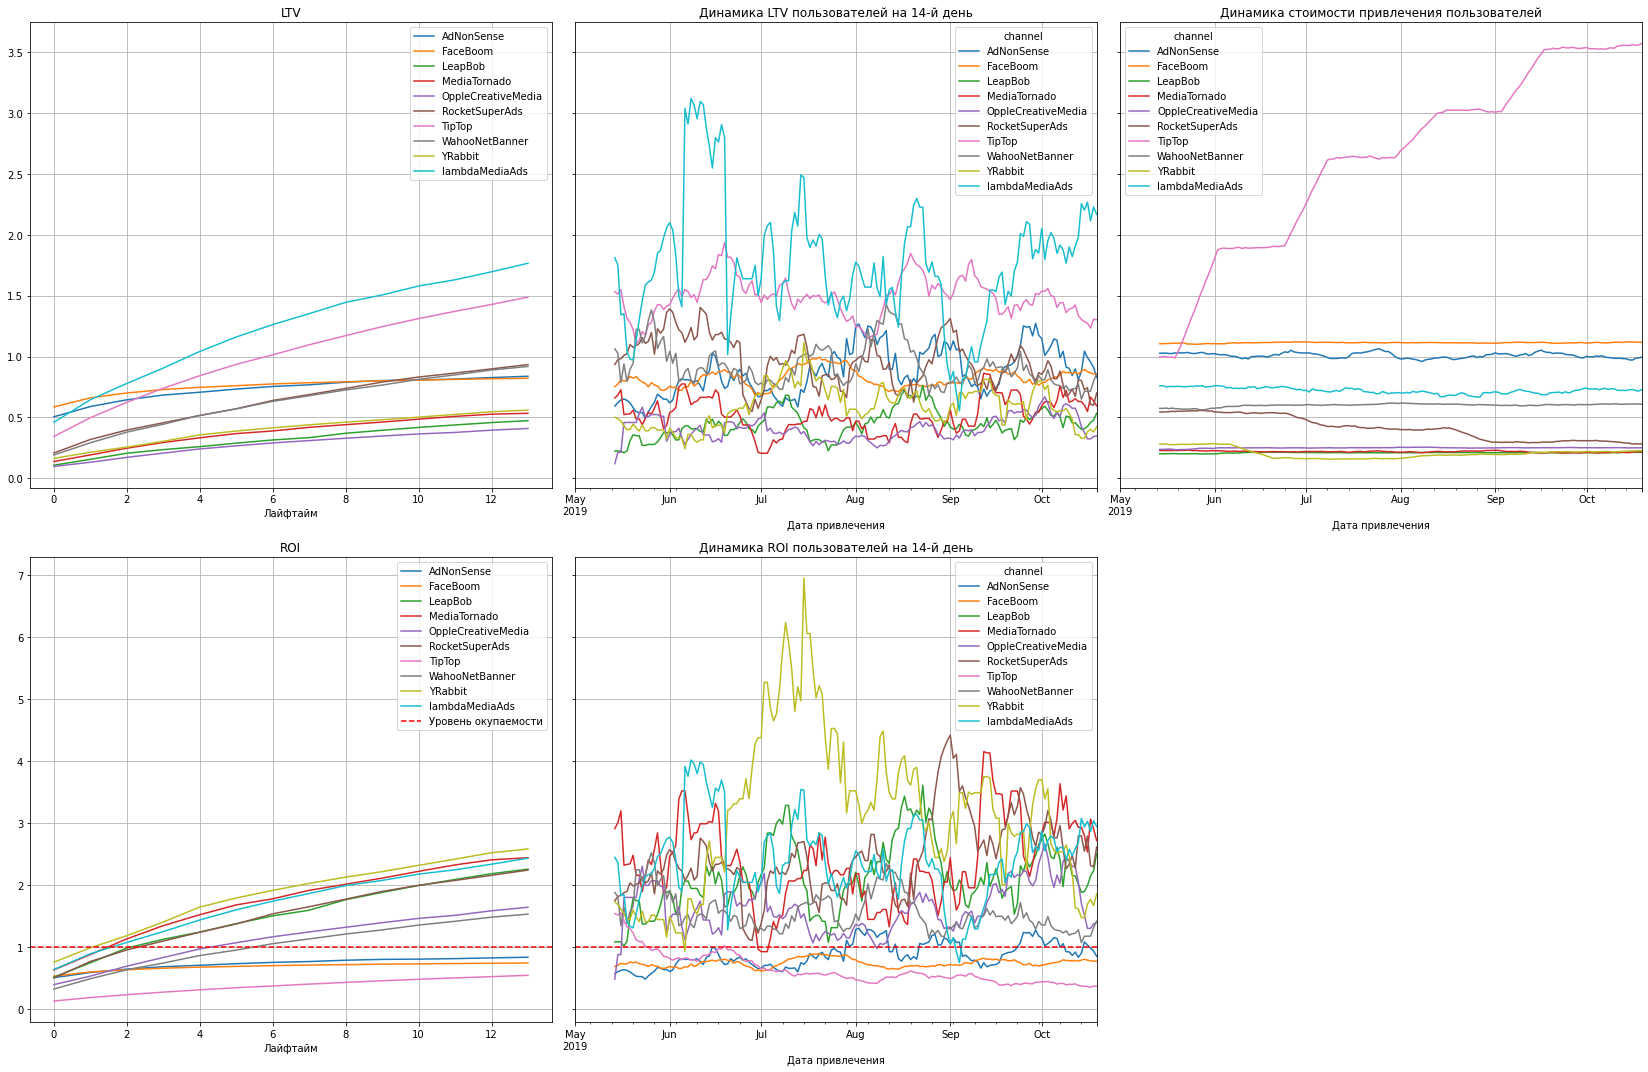

In [43]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Самый большой прирост LTV пользователя был из каналов **lambdaMediaAds** и **TipTop**
2. LTV канала **lambdaMediaAds** не стабилен, присутствуют резкие скачки и провалы, остальные каналы стабильны.
3. CAC пользователя из **TipTop** резко увеличивается весь период с 1 до 3,5. 
4. Рекламана каналах **TipTop**, **FaceBoom** и **AdNonSense** не вышла на окупаемость за 2 недели, худший показатель у **TipTop**.
5. ROI пользователя каналов **TipTop** и **FaceBoom** не окупается с конда мая и снижается весь период. ROI пользователя канала **YRabbit** резко увеличивалась в июле с 4,5 до 7 и к началу августа упала до 3,5.

### Анализ окупаемости рекламы с разбивкой по странам.

Посмотрим окупаемость по странам с помощью функций get_ltv() и plot_ltv_roi()

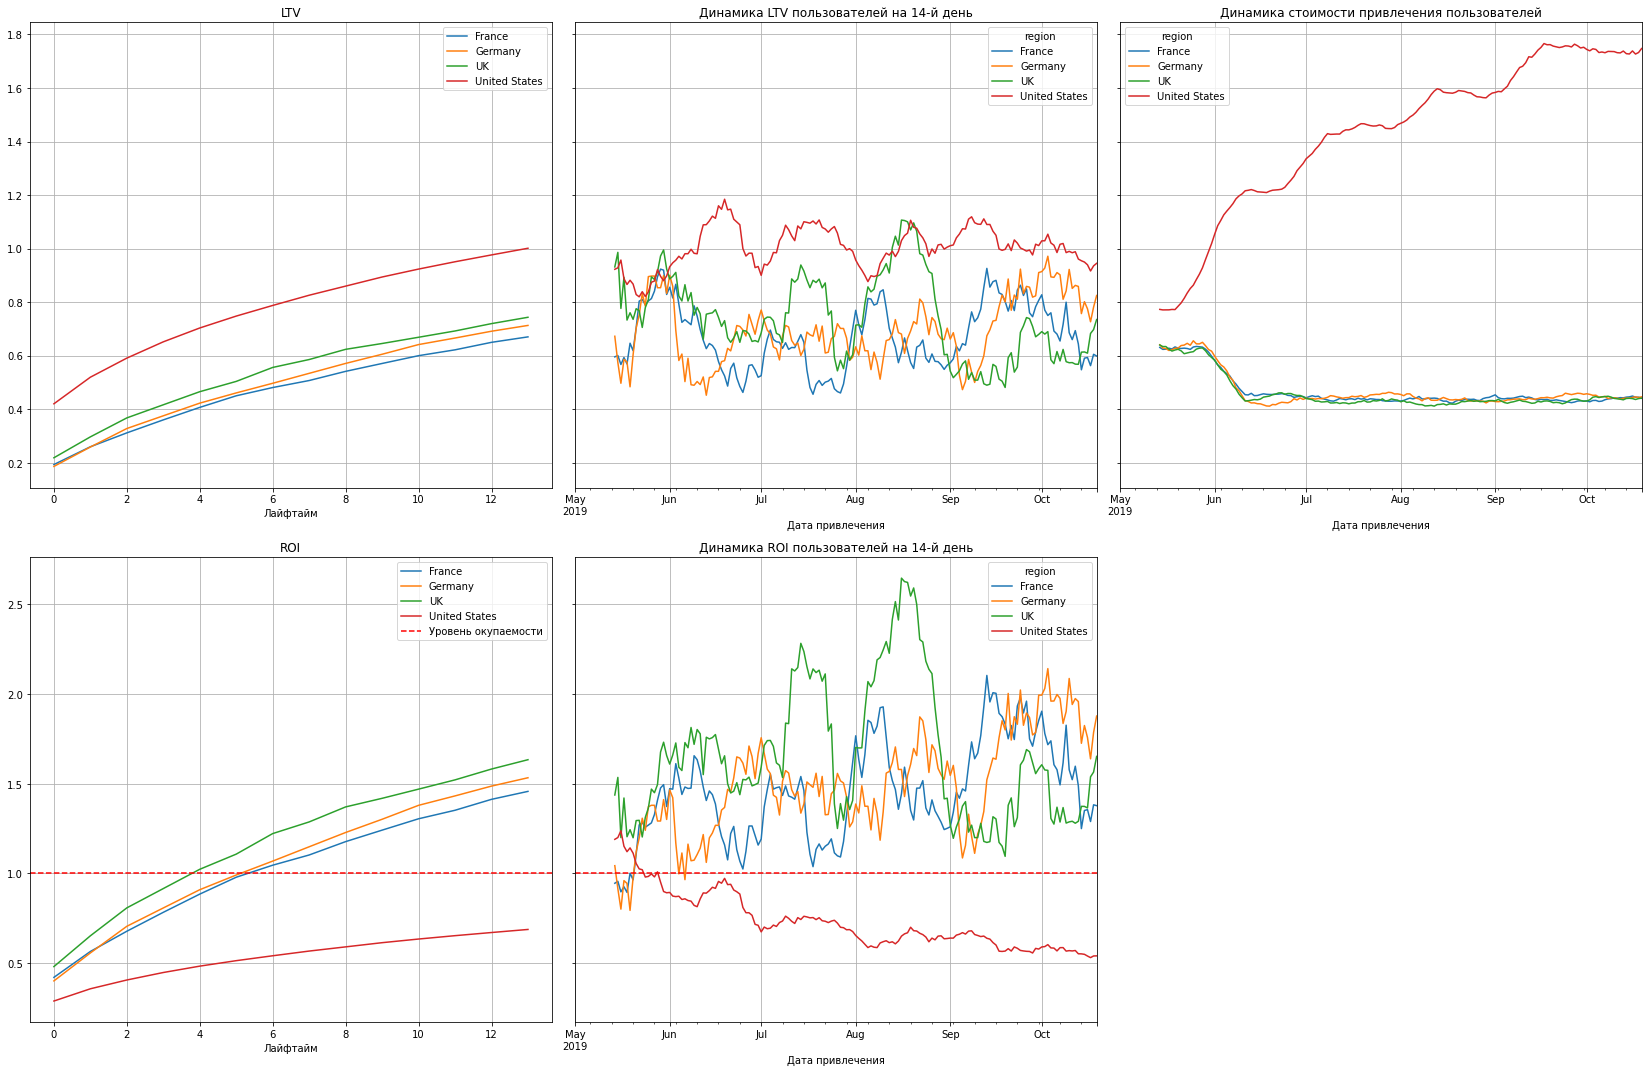

In [44]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а основная аудитория - это пользователи из США.
2. Cтоимость привлечения пользователей из США - самая высокая и продолжает рости.
3. LTV всё так же подвержен сезонности, но стабилен.
4. Лучше всего окупается Великобритания и Германия, хуже всего США. Окупаемость пользователей начала падать с конца июня. 

### Анализ окупаемости рекламы с разбивкой по устройствам.

Посмотрим окупаемость по устройствам с помощью функций get_ltv() и plot_ltv_roi()

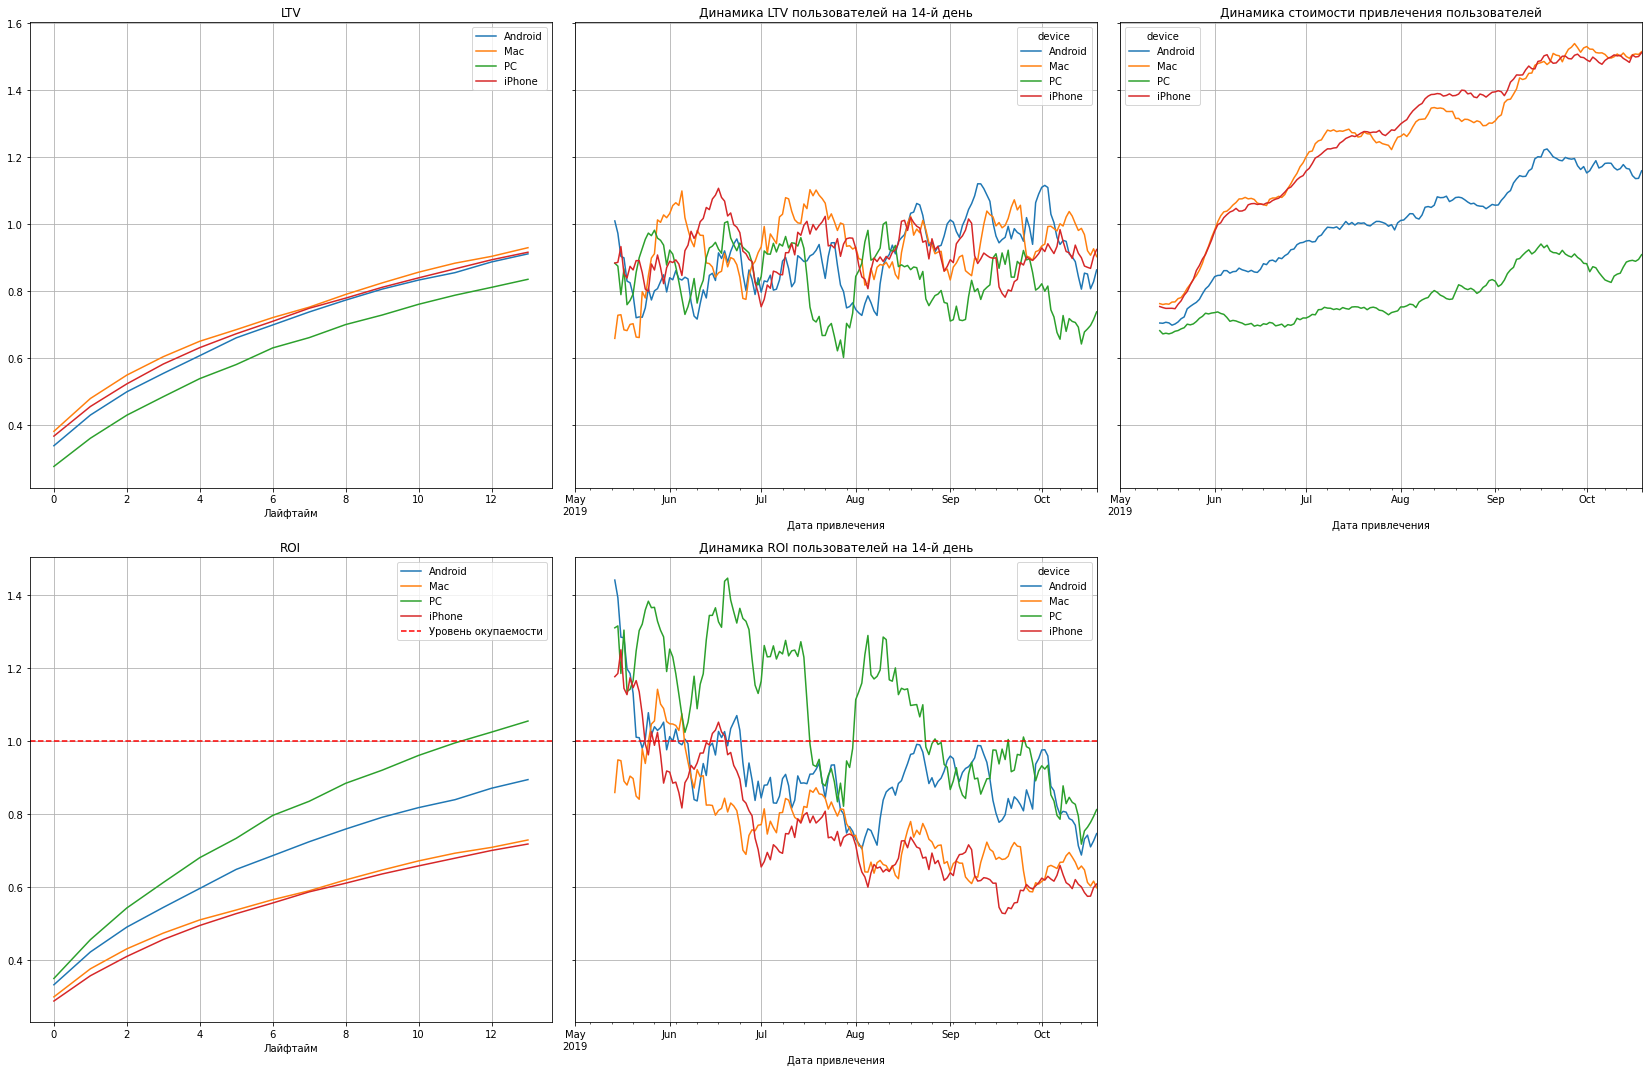

In [45]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Пользователи всех устройств окупались до июня, дальше что-то пошло не так.
2. За 14 дней только ROI **PC** окупилось, на 11 день. ROI **iPhone** и **Mac** на 14 день составляли 70%.
3. LTV стабилен и растет.
4. Стоимость привлечения пользователей **iPhone** и **Мас** самая высокая, а окупаемость самая низкая, при том что целевая аудитория США.
5. Стоимость привлечения пользователей **PC** самая низкая, а окупаемость самая высокая.

Возможно с приложением на устройствах **iPhone** и **Мас** есть какая то проблема, возможно баг.

### Анализ конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

#### Посчитаем и визуализируем конверсию с разбивкой по устройствам. 

Вызовем функции get_conversion() и plot_conversion(). 

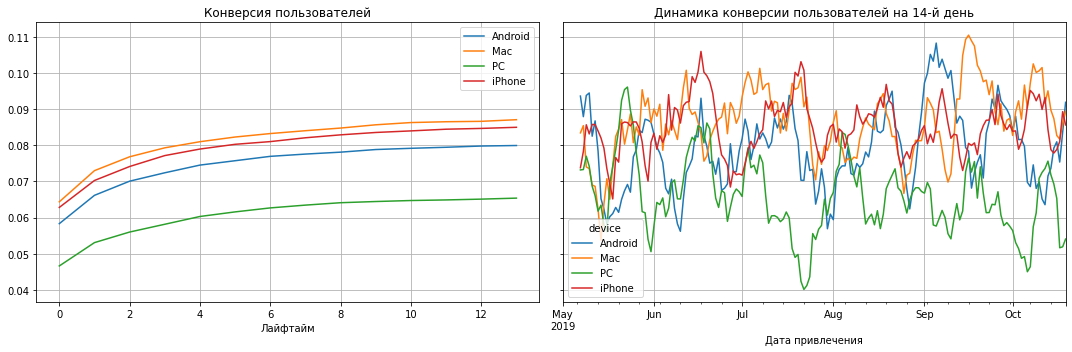

In [46]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, Android и iPhone конвертируются хорошо и постоянно. Ниже конверсия у PC.

Посмотрим удержание пользователей вызвав функцию get_retention() и plot_retention().

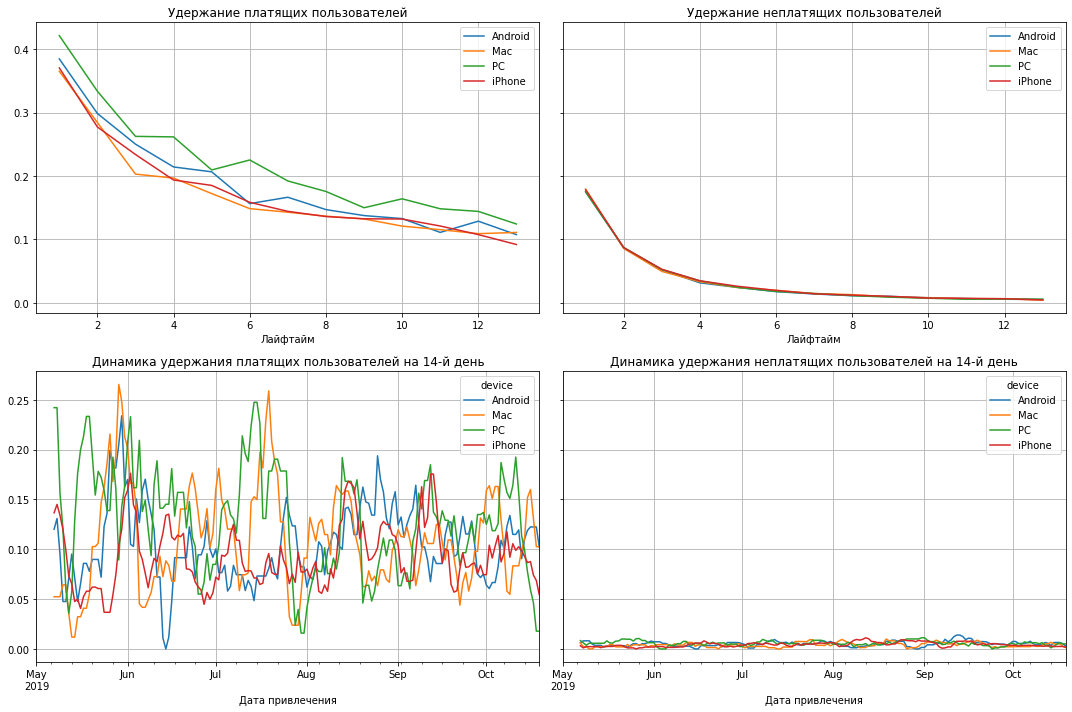

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

#### Посчитаем и визуализируем конверсию с разбивкой по странам. 

Вызовем функции get_conversion() и plot_conversion(). 

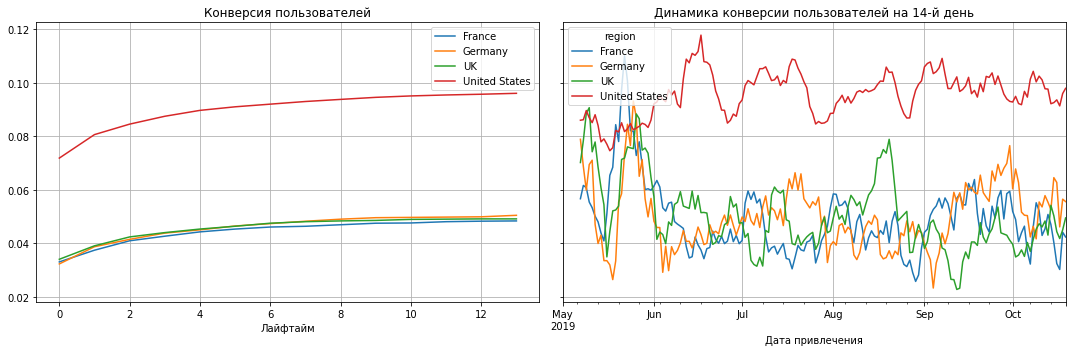

In [48]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конвертируются пользователи из США, но и доля пользователей из США самая большая.

Посмотрим удержание пользователей вызвав функцию get_retention() и plot_retention().

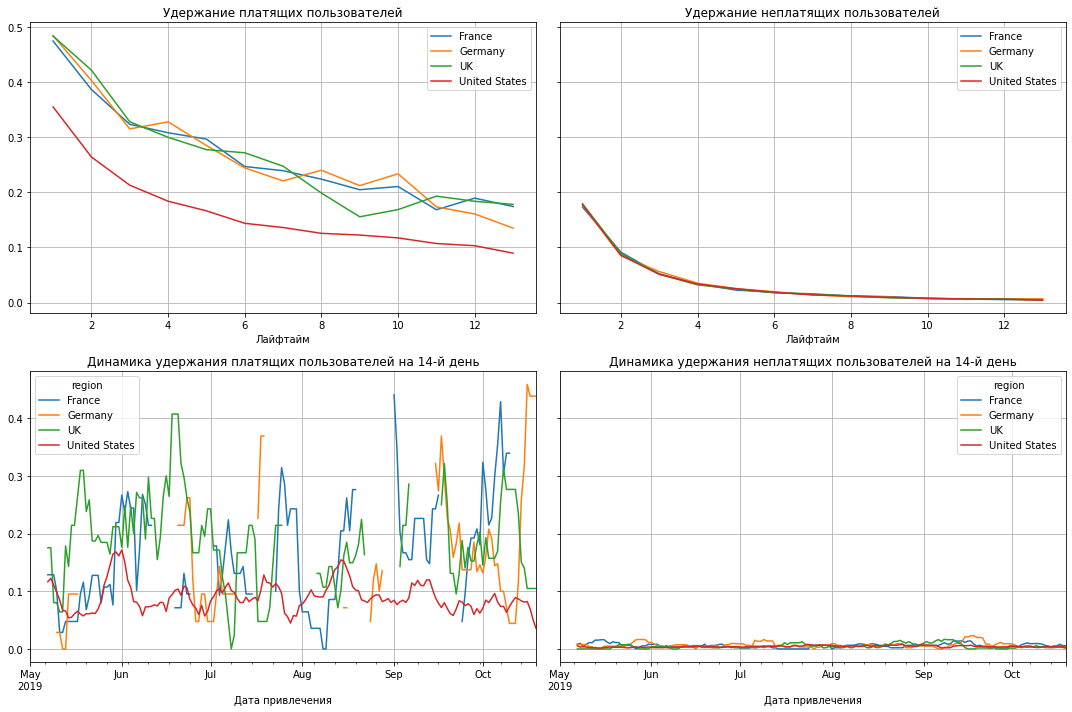

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США удерживаются хуже всех.

#### Посчитаем и визуализируем конверсию с разбивкой по источникам рекламы. 

Вызовем функции get_conversion() и plot_conversion().

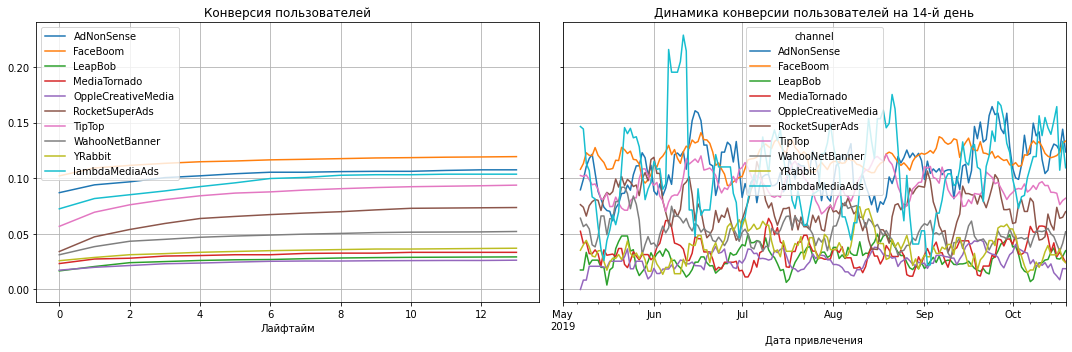

In [50]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

С конверсией все хорошо, лидеры **FaceBoom** и **AdNonSense**, аутсайдеры **LeapBob** и **WahooNetBanner**. Рассмотрим удержание с помощью функций get_retention() и plot_retention().

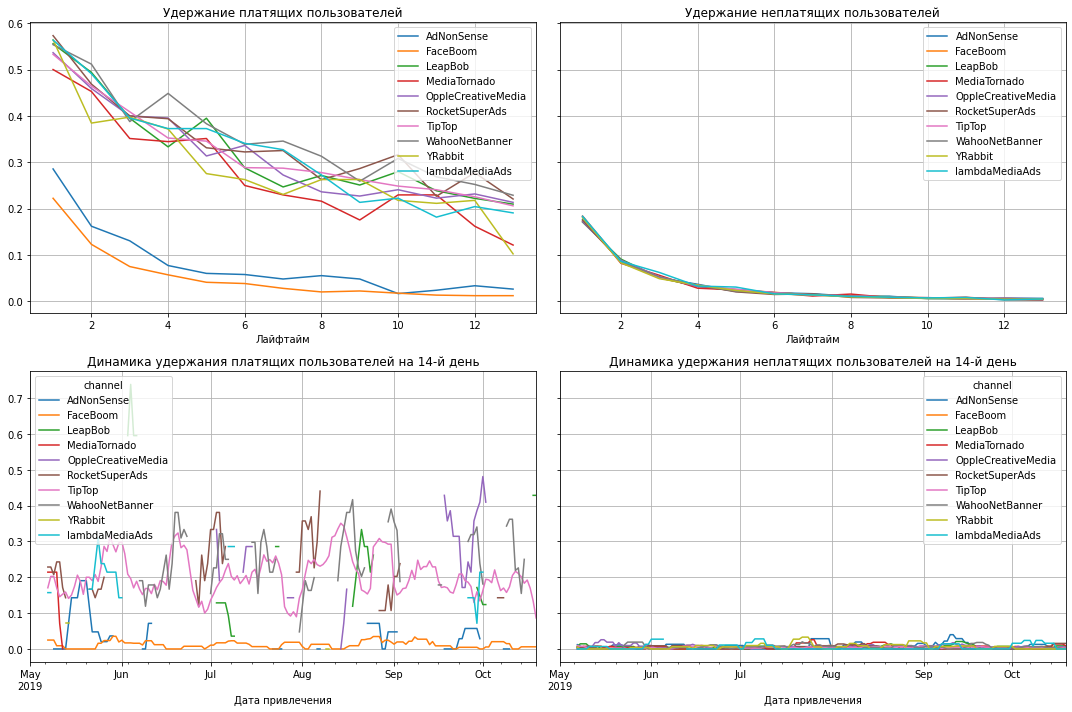

In [51]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Явными аутсайдерами являются **FaceBoom** и **AdNonSense**, у них значительнее хуже удерживаются платящие пользователи.

**Вывод**

В целом, реклама окупается к концу второй недели, **ROI** — примерно 100%
Окупаемость могут снижать владельцы **Mac** и **iPhone**, страна - **США**. Не окупаются пользователи, привлеченные из каналов  **TipTop**, **FaceBoom** и **AdNonSense**.

## Вывод

**1.Причины неэффективности привлечения пользователей**

Оценена окупаемость рекламы. Рассчитан и визуализирован LTV и ROI. По графикам сделаны следующие выводы:

1. Реклама окупается к концу 2й недели. ROI — около 100%.
2. САС не стабилен, рекламный бюджет постоянно увеличиватся, в конце мая - начале июня было резкое увеличение бюджета.
3. На LTV в целом стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователя падает, во второй половине июля перестал окупаться и снизился до 0.8. 
Чтобы разобраться в причинах, мы прошлись по всем доступным характеристикам пользователей — стране и каналу первого посещения.

**Разбивка по странам**

1. Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а основная аудитория - это пользователи из США.
2. Cтоимость привлечения пользователей из США - самая высокая и продолжает рости. В остальных странах стоимость привлечения снизилась и стабилизировалась.
3. LTV так же стабилен.
4. Лучше всего окупается Великобритания и Германия, хуже всего США. Окупаемость пользователей начала падать с конца июня. 

Значит, надо направить внимание на пользователей из США.

Лучше всего конвертируются пользователи из США, но и доля пользователей из США самая большая.

Видно также, что пользователи из США явно плохо удерживаются.

**Разбивка по каналам**

1. Самый большой прирост LTV пользователя был из каналов **lambdaMediaAds** и **TipTop**
2. LTV канала **lambdaMediaAds** не стабилен, присутствуют резкие скачки и провалы, остальные каналы стабильны.
3. CAC пользователя из **TipTop** резко увеличивается весь период с 1 до 3,5. 
4. Реклама на каналах **TipTop**, **FaceBoom** и **AdNonSense** не вышла на окупаемость за 2 недели, худший показатель у **TipTop**.
5. ROI пользователя каналов **TipTop** и **FaceBoom** не окупается с конда мая и снижается весь период. ROI пользователя канала **YRabbit** резко увеличивалась в июле с 4,5 до 7 и к началу августа упала до 3,5.


Лидеры по конверсии **FaceBoom** и **AdNonSense**, аутсайдеры **LeapBob** и **WahooNetBanner**.

Явными аутсайдерами являются **FaceBoom** и **AdNonSense**, у них значительнее хуже удерживаются платящие пользователи.

**Разбивка по устройствам**

1. Пользователи всех устройств окупались до июня, дальше что-то пошло не так.
2. За 14 дней только ROI **PC** окупилось, на 11 день. ROI **iPhone** и **Mac** на 14 день составляли около 70%.
3. LTV стабилен и растет.
4. Стоимость привлечения пользователей **iPhone** и **Мас** самая высокая и продолжает рости, а окупаемость самая низкая, при том что целевая аудитория США.
5. Стоимость привлечения пользователей **PC** самая низкая, а окупаемость самая высокая.

Возможно с приложением на устройствах **iPhone** и **Мас** есть какая то проблема, возможно баг. 


**2.Рекомендации для отдела маркетинга для повышения эффективности**

Направить внимание по окупаемости следует на владельцев **iPhone** и **Mac** - стоимость их привлечения высокая, а окупаемоcть низкая. Возможно, стоит сделать какое-то маркетинговое предложение для владельцев этих устройств и проверить приложение на наличие багов.

Для пользователей из США в целом уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из Америки - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США. Причем окупаемость пользователей начала падать с конца июня 2019 года - стоит также разобраться, что могло послужить причиной.

Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но эффекта от нее получилось не так много, как ожидалось. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.

Не окупаются пользватели, привлеченные из каналов **TipTop**, **FaceBoom** и **AdNonSense**. Больше всего трафика закупали у **TipTop**, и к октябрю число трат приближалось к 630 дол. Число трат на **FaceBoom** находится в районе 300. Остальные каналы привлечения обходятся довольно дешево. Плохо удерживаются пользователи из каналов **FaceBoom** и **AdNonSense**. Можно попробовать переключить внимание на более дешевые, но прибыльные каналы.

Еще можно попробовать применить силу социальных сетей - они сейчас очень динамично развиваются и являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.